# Figures for the Paper

In [8]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.dpi"] = 150

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## introduction

### dataset examples

In [3]:
from deton8.visualization import plot_grid
from deton8.utils import DataReader

In [26]:
raw_data_train = DataReader("../data/training/", invert_white_images=False) 
data_train = DataReader("../data/training/") 
raw_meta, raw_ims = raw_data_train.get(skip=20)
masks = np.stack(raw_data_train.masks)

In [40]:
gridsize = (4,6)
indices = np.random.choice(np.arange(len(raw_ims)), size=np.prod(gridsize), replace=False)
plot_ims = raw_ims[indices]
plot_masks = masks[indices]

In [46]:
indices[[1, 4, 7]]

array([ 5, 23, 15])

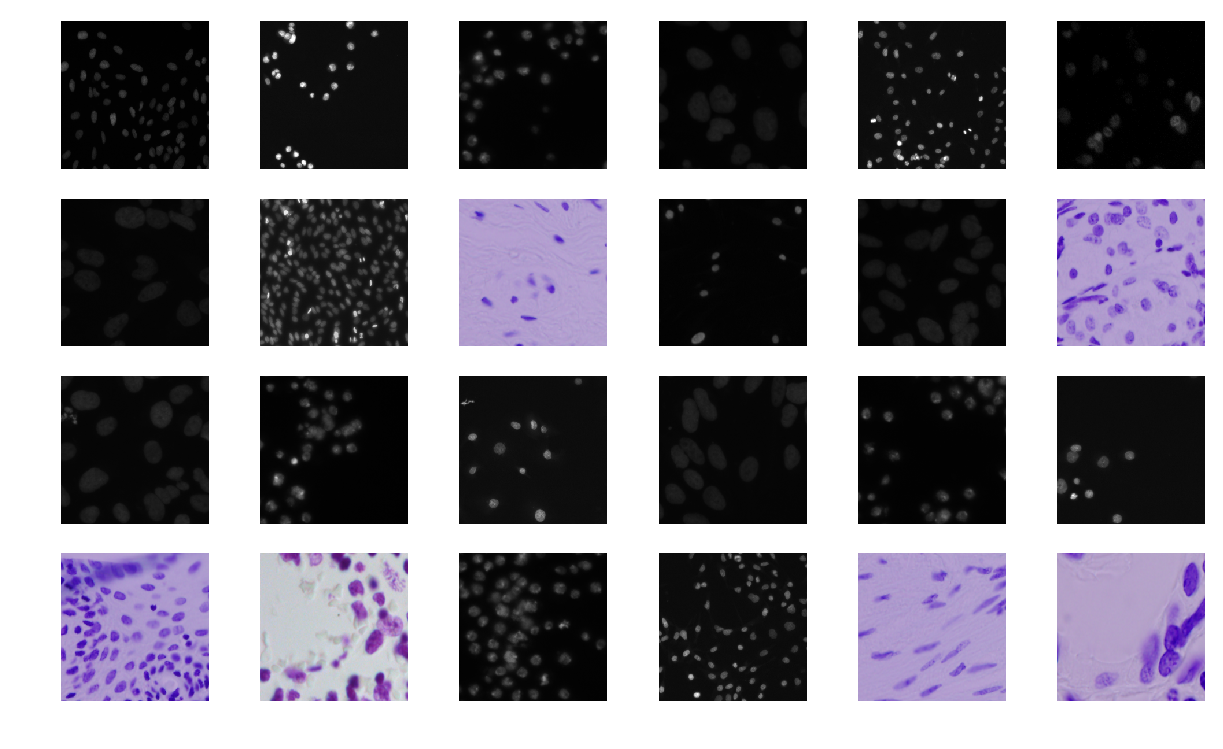

In [43]:
fig = plot_grid(plot_ims, title="", gridsize=(4, 6))
plt.savefig("../paper/figs/dsbowl18-imagegrid-4x6.png", dpi=150)
plt.show()

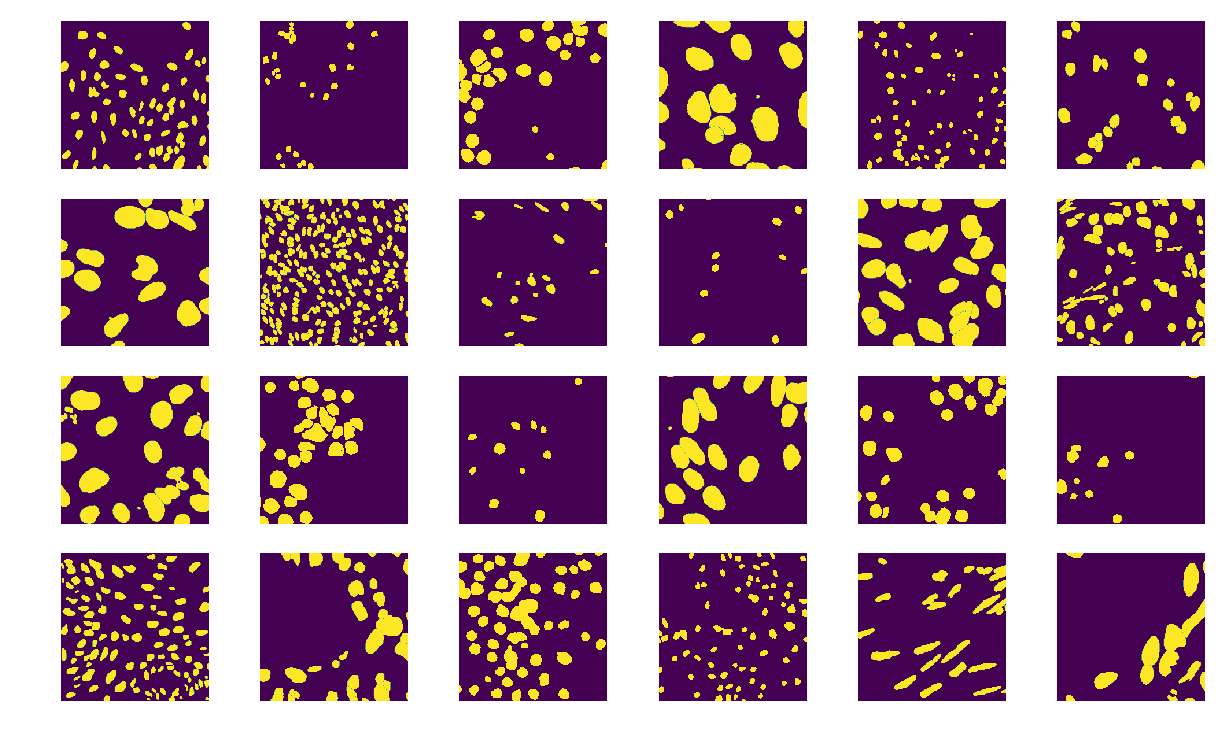

In [44]:
fig = plot_grid(plot_masks, title="", gridsize=(4, 6))
plt.savefig("../paper/figs/dsbowl18-imagegrid-masks-4x6.png", dpi=150)
plt.show()